In [52]:
import sqlite3
import pandas as pd 

In [53]:
cnx=sqlite3.connect(r'/Users/yizhang/Desktop/career service/forma ai/Forma-SQL-Test/sample.db')

In [54]:
df1=pd.read_sql_query('select * from segments',cnx)

In [55]:
df2=pd.read_sql_query('select * from transactions',cnx)

In [56]:
df3=pd.read_sql_query('select* from products',cnx)

In [57]:
df1.head()

,cust_id,seg_name,update_at,active_flag
0,4402,ONE-OFFS,2014-06-01 00:00:00,N
1,4402,LAPSED,2015-12-01 00:00:00,N
2,4402,LAPSED,2015-06-01 00:00:00,N
3,4402,LAPSED,2014-01-01 00:00:00,N
4,4402,ONE-OFFS,2016-02-01 00:00:00,Y


In [58]:
df2.head()

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price
0,1,2016-01-02 10:06:00,9085146,223029,1,42.99
1,2,2016-01-02 10:30:00,1215814,252270,1,103.95
2,2,2016-01-02 10:30:00,1215814,260383,1,74.99
3,4,2016-01-02 11:33:00,18511160,269119,1,51.99
4,4,2016-01-02 11:33:00,18511160,411162,1,59.99


In [59]:
df3.head()

,prod_id,prod_name,brand,category
0,242151,Product 242151,Y,Make up
1,245067,Product 245067,D,Women
2,279311,Product 279311,C,Women
3,75231178,Product 75231178,C,Make up
4,218423,Product 218423,S,Women


In [60]:
df4=pd.merge(df1,df2,how='left',on='cust_id')

In [61]:
df5=pd.merge(df3,df4,how='left',on='prod_id')

In [62]:
df5

,prod_id,prod_name,brand,category,cust_id,seg_name,update_at,active_flag,trans_id,trans_dt,item_qty,item_price
0,242151,Product 242151,Y,Make up,2966476,VIP,2015-06-01 00:00:00,Y,2461.0,2016-05-11 16:48:00,1.0,33.99
1,242151,Product 242151,Y,Make up,2966476,VIP,2014-04-01 00:00:00,N,2461.0,2016-05-11 16:48:00,1.0,33.99
2,242151,Product 242151,Y,Make up,2966476,VIP,2014-01-01 00:00:00,N,2461.0,2016-05-11 16:48:00,1.0,33.99
3,242151,Product 242151,Y,Make up,2966476,VIP,2014-08-01 00:00:00,N,2461.0,2016-05-11 16:48:00,1.0,33.99
4,242151,Product 242151,Y,Make up,2966476,VIP,2014-11-01 00:00:00,N,2461.0,2016-05-11 16:48:00,1.0,33.99
5,242151,Product 242151,Y,Make up,2966476,VIP,2014-07-01 00:00:00,N,2461.0,2016-05-11 16:48:00,1.0,33.99
6,242151,Product 242151,Y,Make up,2966476,VIP,2015-03-01 00:00:00,N,2461.0,2016-05-11 16:48:00,1.0,33.99
7,242151,Product 242151,Y,Make up,2966476,VIP,2015-05-01 00:00:00,N,2461.0,2016-05-11 16:48:00,1.0,33.99
8,245067,Product 245067,D,Women,2966476,VIP,2015-06-01 00:00:00,Y,2461.0,2016-05-11 16:48:00,1.0,29.90
9,245067,Product 245067,D,Women,2966476,VIP,2014-04-01 00:00:00,N,2461.0,2016-05-11 16:48:00,1.0,29.90


In [63]:
df5['revenue']=(df5['item_qty'])*(df5['item_price'])

In [64]:
df5.head()

,prod_id,prod_name,brand,category,cust_id,seg_name,update_at,active_flag,trans_id,trans_dt,item_qty,item_price,revenue
0,242151,Product 242151,Y,Make up,2966476,VIP,2015-06-01 00:00:00,Y,2461.0,2016-05-11 16:48:00,1.0,33.99,33.99
1,242151,Product 242151,Y,Make up,2966476,VIP,2014-04-01 00:00:00,N,2461.0,2016-05-11 16:48:00,1.0,33.99,33.99
2,242151,Product 242151,Y,Make up,2966476,VIP,2014-01-01 00:00:00,N,2461.0,2016-05-11 16:48:00,1.0,33.99,33.99
3,242151,Product 242151,Y,Make up,2966476,VIP,2014-08-01 00:00:00,N,2461.0,2016-05-11 16:48:00,1.0,33.99,33.99
4,242151,Product 242151,Y,Make up,2966476,VIP,2014-11-01 00:00:00,N,2461.0,2016-05-11 16:48:00,1.0,33.99,33.99


In [224]:
df5['category'].unique()

array(['Make up', 'Women', 'Men', 'Accessoires', 'Sun'], dtype=object)

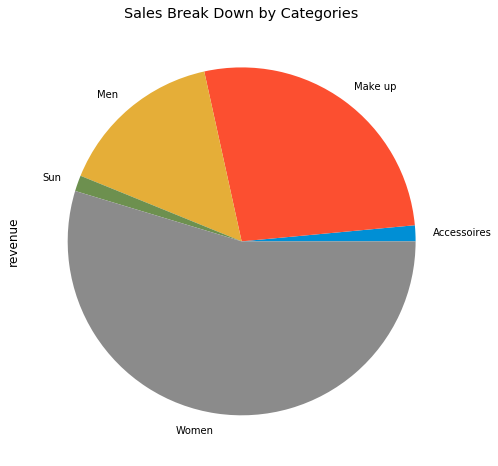

In [227]:
# making categorical analysis
df5.groupby('category').sum()['revenue'].plot(kind='pie',title='Sales Break Down by Categories')


# Sales Trend Analysis 


## Data Processing 

In [66]:
# I want to find out sales trend of 'Women' 
# drop redundant features
ds1=df5.loc[df5['category']=='Women',['trans_dt','revenue']]


In [67]:
ds1.head()

,trans_dt,revenue
8,2016-05-11 16:48:00,29.9
9,2016-05-11 16:48:00,29.9
10,2016-05-11 16:48:00,29.9
11,2016-05-11 16:48:00,29.9
12,2016-05-11 16:48:00,29.9


In [68]:
ds1=ds1.groupby('trans_dt').sum()['revenue'].reset_index()

In [69]:
ds1.info()
ds1['trans_dt']=pd.to_datetime(ds1['trans_dt'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 2 columns):
trans_dt    616 non-null object
revenue     616 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.8+ KB


In [70]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 2 columns):
trans_dt    616 non-null datetime64[ns]
revenue     616 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.8 KB


In [71]:
ds1=ds1.set_index('trans_dt')


In [72]:
ds1.head()

,revenue
trans_dt,
2016-01-02 00:00:00,200.94
2016-01-02 09:06:00,264.95
2016-01-02 09:07:00,230.65
2016-01-02 09:08:00,629.82
2016-01-02 09:09:00,59.94


In [210]:
woman_sales_by_day=ds1['revenue'].resample('D').mean()

# There are a lot of missing values associate with time series, so how to deal with missing values is key.
woman_sales_by_day


trans_dt
2016-01-02    606.808614
2016-01-03           NaN
2016-01-04    779.835000
2016-01-05           NaN
2016-01-06           NaN
                 ...    
2016-06-14           NaN
2016-06-15    969.775000
2016-06-16    615.930000
2016-06-17    339.910000
2016-06-18    718.360000
Freq: D, Name: revenue, Length: 169, dtype: float64

In [211]:
# In order to make time series soomth, I decide to fill null value with 0
woman_sales_by_day.fillna(value=0,inplace = True)
woman_sales_by_day

trans_dt
2016-01-02    606.808614
2016-01-03      0.000000
2016-01-04    779.835000
2016-01-05      0.000000
2016-01-06      0.000000
                 ...    
2016-06-14      0.000000
2016-06-15    969.775000
2016-06-16    615.930000
2016-06-17    339.910000
2016-06-18    718.360000
Freq: D, Name: revenue, Length: 169, dtype: float64

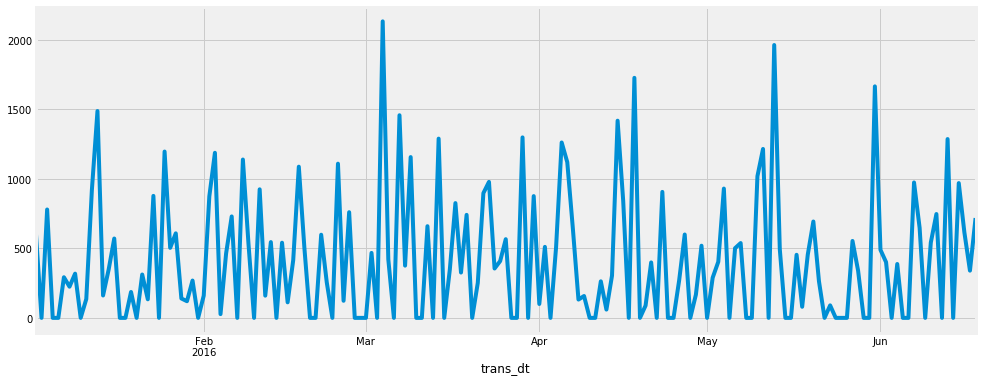

In [212]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
woman_sales_by_day.plot(figsize=(15,6))


In [213]:
#I want to visulize the data using a method called time-series decomposition 
# Which allows to break times-series down into three distinct components:trend, seasonality,and noise
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8

## Additive Decomposition Model
X=T(trend)+S(seasonality)+R(residual):
   Additive model describe a linear relationship 

In [214]:
from statsmodels.tsa.seasonal import seasonal_decompose

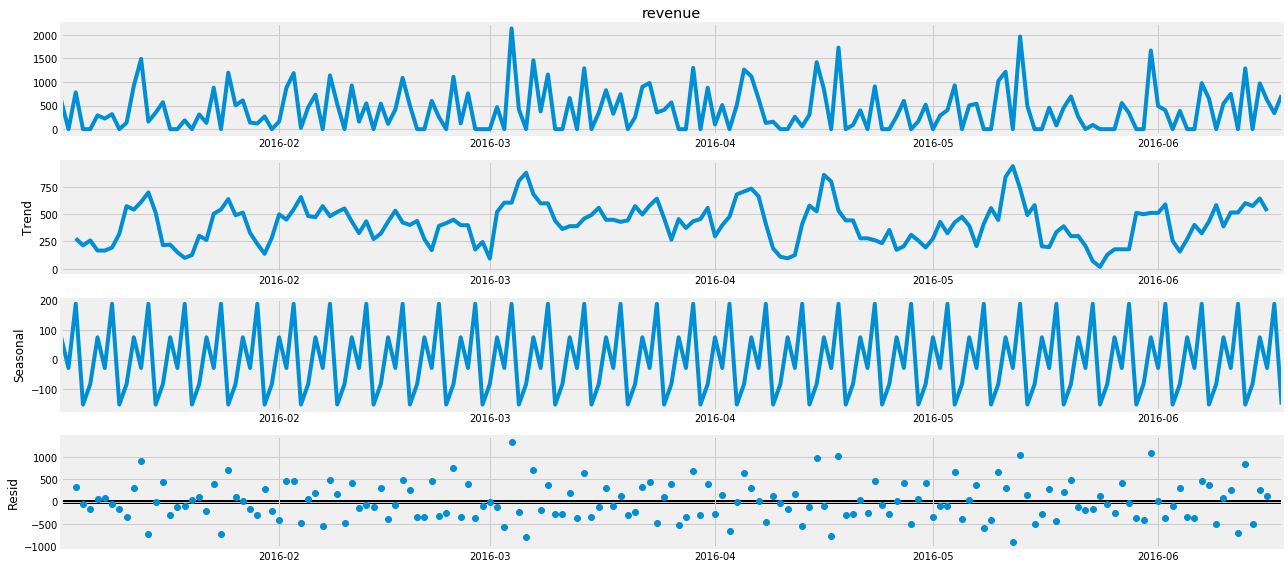

In [215]:
import numpy as np
decomposition=seasonal_decompose(woman_sales_by_day,period=5,model='additive')
decomposition.plot()
plt.show()




It seems like sales of category 'woman' is very unstable along witha obvious seasonality

# Time Series Forecasting with ARIMA

ARIMA(q,d,p) represent: seasonality, trend, and noise.



AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.


I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

In [33]:
# first step is find out optimize set of (q,d,p) value by using'grid search'
# I choose lowset values of Akaike's Information Criterion (AIC) 

The AIC value will allow us to compare how well a model fits the data and takes into account the complexity of a model, so models that have a better fit while using fewer features will receive a better (lower) AIC score than similar models that utilize more features.

In [194]:
# actually sales data has obvious seasonality so seasonal ARIMA,which add seasoanl adjust, need to be applied
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [195]:

import warnings
import statsmodels.api as sm
from pandas.util._decorators import Appender
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            md = sm.tsa.statespace.SARIMAX(woman_sales_by_day,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = md.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2639.1990756681816
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2437.827926558327
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2473.915756827285
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2213.2213622719073
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2439.1837620526967
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2394.5103164254106
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2267.2822107611687
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2214.8871726556777
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2612.514456520248
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2419.44266933617
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2457.49180010037
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2196.715115862876
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2440.4795981100206
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2376.2891690279653
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2263.814278003065
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2198.296498015833
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2663.6032237786712
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2477.264121981494
ARI

In [196]:
#lowest score of (q,d,p) is 2187.373502607115
mod = sm.tsa.statespace.SARIMAX(woman_sales_by_day,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            revenue   No. Observations:                  169
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1089.687
Date:                            Mon, 23 Mar 2020   AIC                           2187.374
Time:                                    02:46:35   BIC                           2199.197
Sample:                                01-02-2016   HQIC                          2192.178
                                     - 06-18-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1576      0.088     -1.787      0.074      -0.330       0.015
ma.L1         -1.0000      2.919   

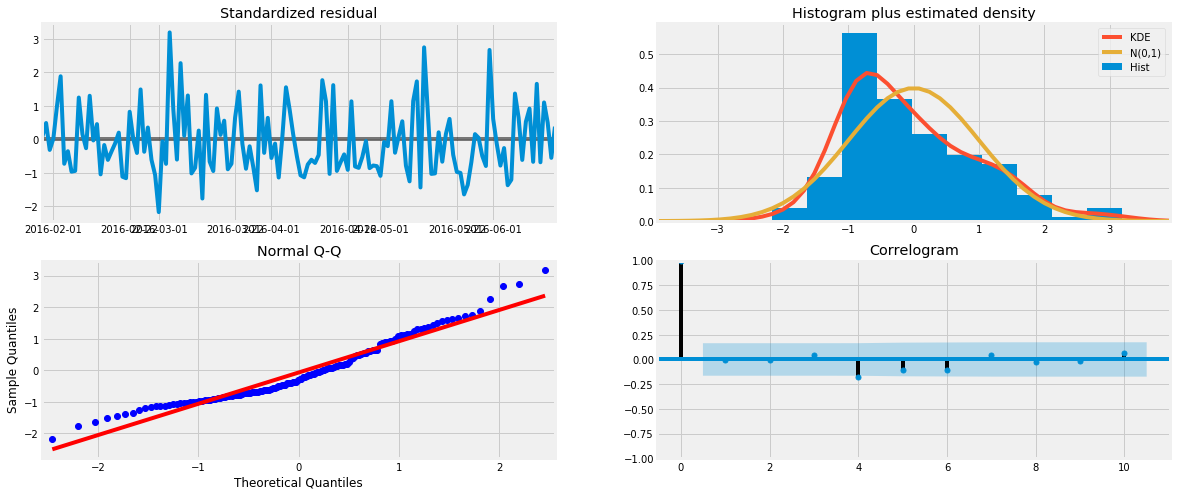

In [226]:
# to find out some abnormals
results.plot_diagnostics()
plt.show()

Although model is not perfect, residual is more likely to follow Gaussian distribution

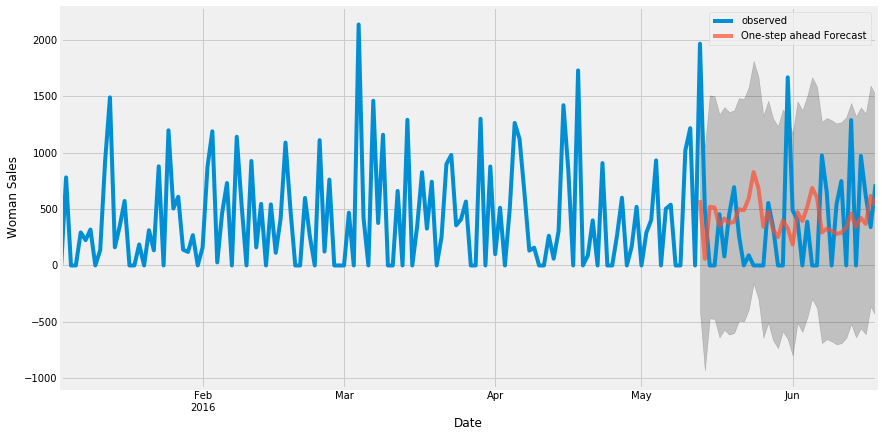

In [198]:
pred = results.get_prediction(start=pd.to_datetime('2016-05-13'), dynamic=False)
pred_ci = pred.conf_int()
ax = woman_sales_by_day['2016-01-03':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(13, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Woman Sales')
plt.legend()

plt.show()

In [199]:
pred_ci

,lower revenue,upper revenue
trans_dt,,
2016-05-13,-410.746251,1567.354783
2016-05-14,-928.997659,1045.525948
2016-05-15,-467.085366,1506.350263
2016-05-16,-474.007378,1498.912303
2016-05-17,-637.295049,1335.097331
2016-05-18,-569.848927,1402.042125
2016-05-19,-612.420590,1358.990971
2016-05-20,-598.212528,1372.740132
2016-05-21,-488.560878,1481.952184


In [200]:
woman_sales_by_day['2016-05-13':]

trans_dt
2016-05-13    1963.330000
2016-05-14     493.490000
2016-05-15       0.000000
2016-05-16       0.000000
2016-05-17     453.784444
2016-05-18      79.920000
2016-05-19     454.880000
2016-05-20     693.356667
2016-05-21     263.880000
2016-05-22       0.000000
2016-05-23      89.990000
2016-05-24       0.000000
2016-05-25       0.000000
2016-05-26       0.000000
2016-05-27     553.375000
2016-05-28     339.652500
2016-05-29       0.000000
2016-05-30       0.000000
2016-05-31    1665.830000
2016-06-01     489.405000
2016-06-02     400.950000
2016-06-03       0.000000
2016-06-04     387.652000
2016-06-05       0.000000
2016-06-06       0.000000
2016-06-07     974.240000
2016-06-08     647.920000
2016-06-09       0.000000
2016-06-10     541.674000
2016-06-11     747.150000
2016-06-12       0.000000
2016-06-13    1286.670000
2016-06-14       0.000000
2016-06-15     969.775000
2016-06-16     615.930000
2016-06-17     339.910000
2016-06-18     718.360000
Freq: D, Name: revenue, dtype

In [201]:
# MSE used for validate model's qulity, lower is better.
woman_truth=woman_sales_by_day['2016-05-13':]
woman_forecasted=pred.predicted_mean
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(woman_truth,woman_forecasted)
print('mean squre error is:{}'.format(mse))

mean squre error is:273522.2649100772


In [202]:
#RMSE is average squared difference between the estimated values and what is estimated
from math import sqrt
rmse = sqrt(mean_squared_error(woman_truth,woman_forecasted))
print('root of mean squre error is:{}'.format( rmse))

root of mean squre error is:522.9935610598635


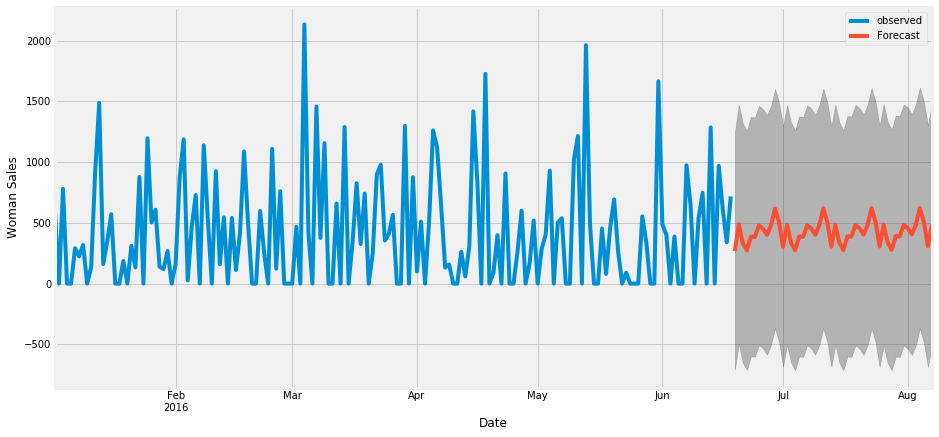

In [203]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = woman_sales_by_day.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Woman Sales')
plt.legend()
plt.show()

In [222]:
print('Maxium and Minum sales in next 100 days will be: {} and {}'.format(max(pred_uc.predicted_mean),min(pred_uc.predicted_mean)))

Maxium and Minum sales in next 100 days will be: 622.1634146573471 and 268.62182657473886
